# Load Data

In [1]:
from pyrecdp.datasets import ibm_fraud_detect

full_data = ibm_fraud_detect().to_pandas()
train_data = full_data[full_data['Year'] <= 2018]
train_data

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24385063,1999,1,2018,12,30,11:42,$50.21,Chip Transaction,-3345936507911876459,Manchester,NH,3102.0,7538,NaN,No
24385064,1999,1,2018,12,30,20:17,$46.29,Online Transaction,-5841929396161652653,ONLINE,NaN,NaN,4121,NaN,No
24385065,1999,1,2018,12,31,09:20,$5.11,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,5311,NaN,No
24385066,1999,1,2018,12,31,11:28,$77.22,Chip Transaction,2910328604019547969,Milford,NH,3055.0,7538,NaN,No


# RecDP Analyze data

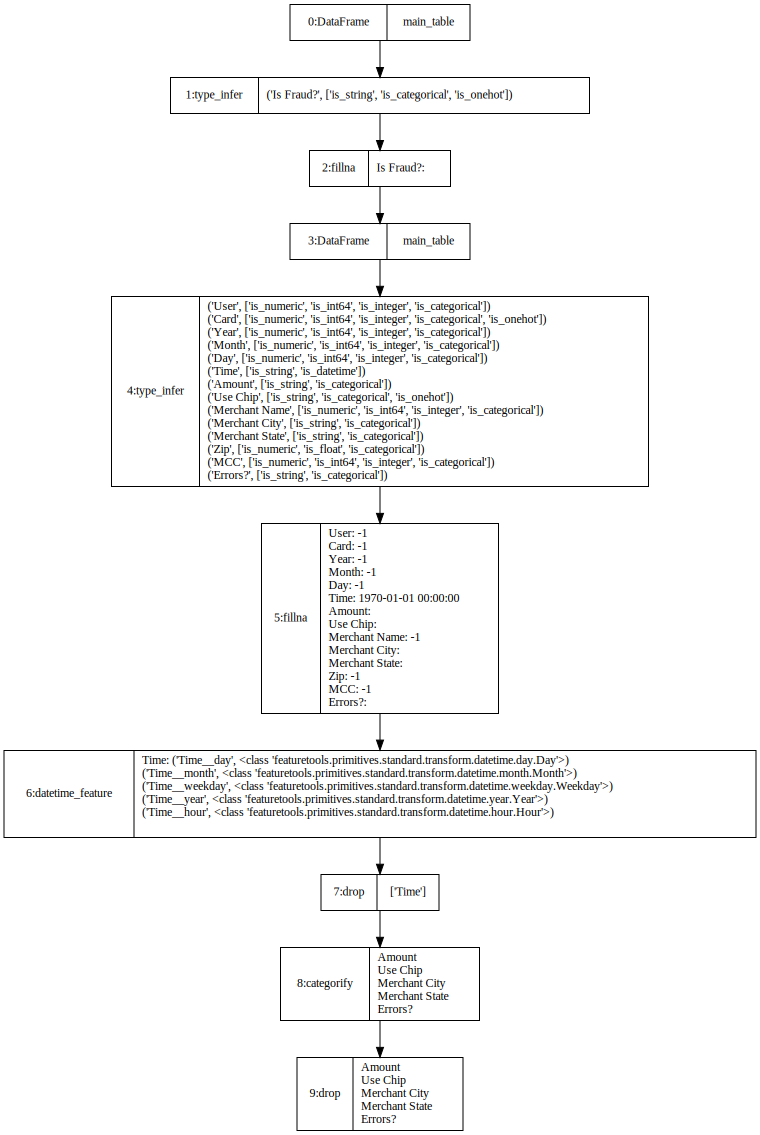

In [2]:
from pyrecdp.autofe import FeatureWrangler

data_pipeline = FeatureWrangler(dataset=train_data, label="Is Fraud?")
data_pipeline.plot()

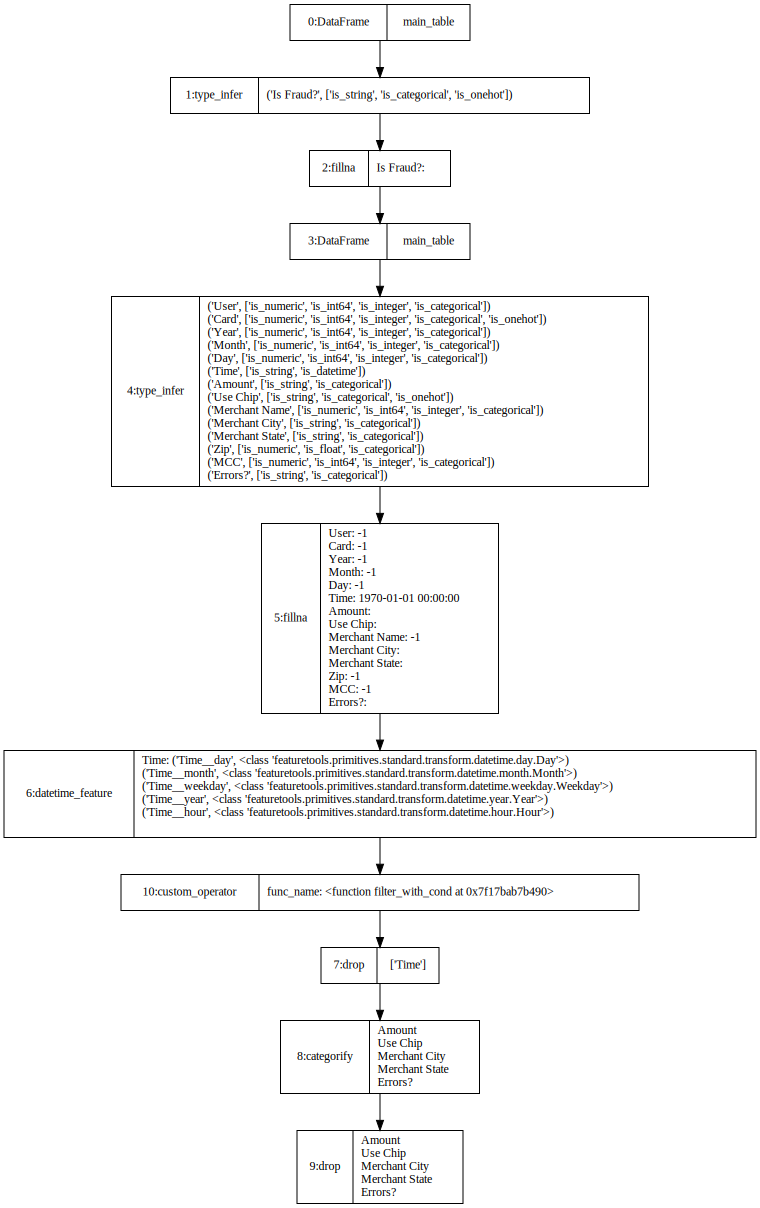

In [4]:
def filter_with_cond(df):
    df = df[df['Year'] <= 2017]
    return df
operation = {
    "children": [6], # will to append this new op
    "next": [7], # who will be connected to this new op
    "inline_function": filter_with_cond, # function
}
data_pipeline.add_operation(operation)

In [5]:
transformed = data_pipeline.fit_transform("pandas")
transformed

{0: DataFrame, 1: type_infer, 2: fillna, 3: DataFrame, 4: type_infer, 5: fillna, 6: datetime_feature, 10: custom_operator, 7: drop, 8: categorify, 9: drop}
execute with pandas started ...
execute DataFrame started ...
  execute DataFrame took 6.999005563557148e-06 sec
execute type_infer started ...
  execute type_infer took 2.5253044441342354e-05 sec
execute fillna started ...
  execute fillna took 1.2356721289688721 sec
execute DataFrame started ...
  execute DataFrame took 1.1979020200669765e-05 sec
execute type_infer started ...
  execute type_infer took 5.150529109989293 sec
execute fillna started ...
  execute fillna took 9.703116737073287 sec
execute datetime_feature started ...
  execute datetime_feature took 7.869528590934351 sec
execute custom_operator started ...
  execute custom_operator took 3.955078372033313 sec
execute drop started ...
  execute drop took 1.633885363000445 sec
execute categorify started ...
  execute categorify took 4.913625075016171 sec
execute drop star

,User,Card,Year,Month,Day,Merchant Name,Zip,MCC,Is Fraud?,Time__day,Time__month,Time__weekday,Time__year,Time__hour,Amount__idx,Use Chip__idx,Merchant City__idx,Merchant State__idx,Errors?__idx
0,0,0,2002,9,1,3527213246127876953,91750.0,5300,No,22,3,2,2023,6,0,0,0,0,0
1,0,0,2002,9,1,-727612092139916043,91754.0,5411,No,22,3,2,2023,6,1,0,1,0,0
2,0,0,2002,9,2,-727612092139916043,91754.0,5411,No,22,3,2,2023,6,2,0,1,0,0
3,0,0,2002,9,2,3414527459579106770,91754.0,5651,No,22,3,2,2023,17,3,0,1,0,0
4,0,0,2002,9,3,5817218446178736267,91750.0,5912,No,22,3,2,2023,6,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24383407,1999,1,2017,12,31,-6160036380778658394,-1.0,4121,No,22,3,2,2023,7,11181,1,2,1,0
24383408,1999,1,2017,12,31,-7389834768703789874,85009.0,7538,No,22,3,2,2023,11,13613,2,301,13,0
24383409,1999,1,2017,12,31,-2472481739355111587,85009.0,7538,No,22,3,2,2023,11,1524,2,301,13,0
24383410,1999,1,2017,12,31,6455213054093379528,-1.0,5815,No,22,3,2,2023,12,8118,1,2,1,0


# delete operator

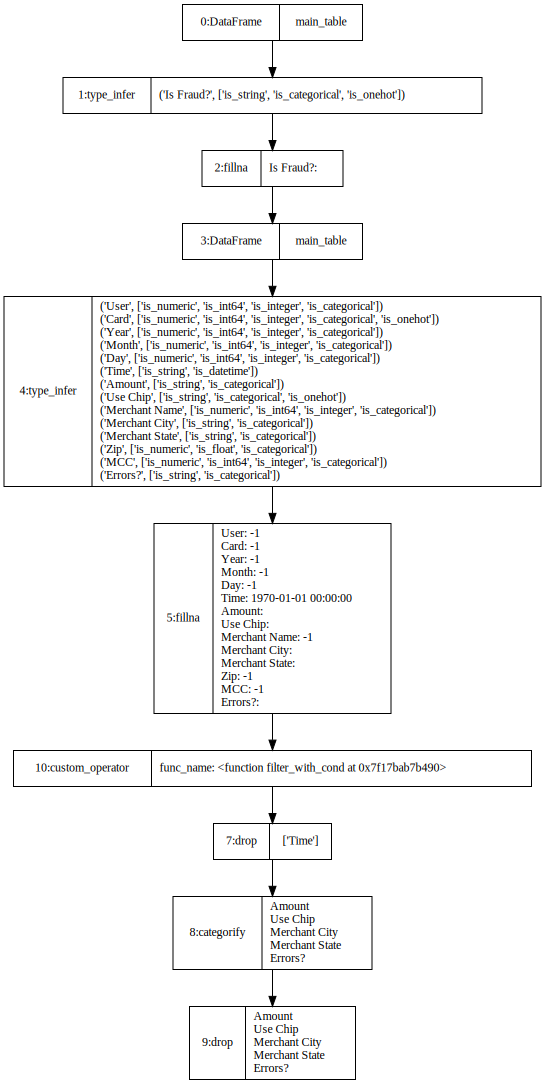

In [6]:
operation = {
    "idx": 6,
    "next": [10]
}
data_pipeline.delete_operation(operation)

In [7]:
transformed = data_pipeline.fit_transform("pandas", no_cache = True)
transformed

{0: DataFrame, 1: type_infer, 2: fillna, 3: DataFrame, 4: type_infer, 5: fillna, 10: custom_operator, 7: drop, 8: categorify, 9: drop}
execute with pandas started ...
execute DataFrame started ...
  execute DataFrame took 8.014962077140808e-06 sec
execute type_infer started ...
  execute type_infer took 3.408396150916815e-05 sec
execute fillna started ...
  execute fillna took 1.219478320912458 sec
execute DataFrame started ...
  execute DataFrame took 1.7505022697150707e-05 sec
execute type_infer started ...
  execute type_infer took 5.102074180031195 sec
execute fillna started ...
  execute fillna took 9.645901662064716 sec
execute custom_operator started ...
  execute custom_operator took 1.826275018043816 sec
execute drop started ...
  execute drop took 1.2917778469854966 sec
execute categorify started ...
  execute categorify took 4.9082414619624615 sec
execute drop started ...
  execute drop took 1.0401143060298637 sec
execute with pandas took 28.28791212802753 sec


,User,Card,Year,Month,Day,Merchant Name,Zip,MCC,Is Fraud?,Amount__idx,Use Chip__idx,Merchant City__idx,Merchant State__idx,Errors?__idx
0,0,0,2002,9,1,3527213246127876953,91750.0,5300,No,0,0,0,0,0
1,0,0,2002,9,1,-727612092139916043,91754.0,5411,No,1,0,1,0,0
2,0,0,2002,9,2,-727612092139916043,91754.0,5411,No,2,0,1,0,0
3,0,0,2002,9,2,3414527459579106770,91754.0,5651,No,3,0,1,0,0
4,0,0,2002,9,3,5817218446178736267,91750.0,5912,No,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24383407,1999,1,2017,12,31,-6160036380778658394,-1.0,4121,No,11181,1,2,1,0
24383408,1999,1,2017,12,31,-7389834768703789874,85009.0,7538,No,13613,2,301,13,0
24383409,1999,1,2017,12,31,-2472481739355111587,85009.0,7538,No,1524,2,301,13,0
24383410,1999,1,2017,12,31,6455213054093379528,-1.0,5815,No,8118,1,2,1,0
